In [33]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [34]:
#Importing the data
df= pd.read_csv(r"C:\Users\anshul dubey\Downloads\BTC-USD.csv")



In [42]:
df.head

<bound method NDFrame.head of           Date          Open          High           Low         Close  \
0   2022-04-26  40448.421875  40713.890625  37884.984375  38117.460938   
1   2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2   2022-04-28  39241.429688  40269.464844  38941.421875  39773.828125   
3   2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   
4   2022-04-30  38605.859375  38771.210938  37697.941406  37714.875000   
..         ...           ...           ...           ...           ...   
361 2023-04-22  27265.894531  27872.142578  27169.570313  27817.500000   
362 2023-04-23  27816.144531  27820.244141  27400.314453  27591.384766   
363 2023-04-24  27591.730469  27979.982422  27070.849609  27525.339844   
364 2023-04-25  27514.873047  28371.078125  27207.931641  28307.597656   
365 2023-04-26  28300.058594  29995.837891  27324.548828  28422.701172   

        Adj Close       Volume  
0    38117.460938  34569088416  
1    39241.1210

# Plotting the time series
Using date as index the series is plotted with Date on x axis and closing price on y axis.

C:\Users\ANSHUL~1\AppData\Local\Temp/ipykernel_20396/1753499339.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


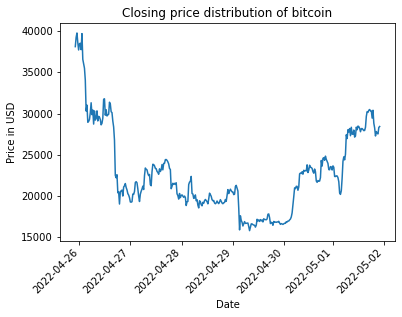

In [37]:
data = df['Close']
Date1 = df['Date']
train1 = df[['Date','Close']]
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)

# Convert index to datetime format
train2.index = pd.to_datetime(train2.index)

# Create a line plot
fig, ax = plot.subplots()
ax.plot(train2)
ax.set_xlabel('Date')
ax.set_ylabel('Price in USD')
ax.set_title('Closing price distribution of bitcoin')

# Set the x-axis label to include the year
labels = [item.strftime('%Y-%m-%d') for item in train2.index]
ax.set_xticklabels(labels, rotation=45, ha='right')

plot.show()


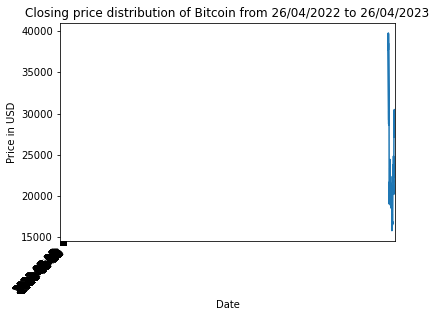

In [39]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(train2.loc['2022-04-26':'2023-04-26'])

# Set the x-axis label to include the year
labels = [item.strftime('%Y-%m-%d') for item in train2.loc['2022-04-26':'2023-04-26'].index]
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Closing price distribution of Bitcoin from 26/04/2022 to 26/04/2023')

# Show the plot
plt.show()



C:\Users\ANSHUL~1\AppData\Local\Temp/ipykernel_20396/2107178510.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


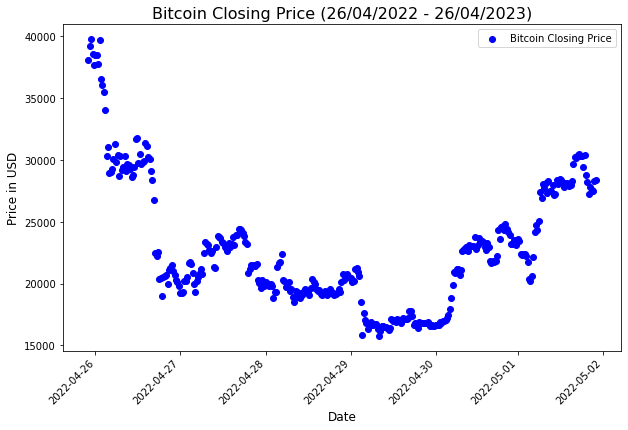

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
ax.scatter(train2.loc['2022-04-26':'2023-04-26'].index, train2.loc['2022-04-26':'2023-04-26']['Close'], color='blue', label='Bitcoin Closing Price')

# Set title and axis labels
ax.set_title('Bitcoin Closing Price (26/04/2022 - 26/04/2023)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price in USD', fontsize=12)

# Set the x-axis label to include the year
labels = [item.strftime('%Y-%m-%d') for item in train2.loc['2022-04-26':'2023-04-26'].index]
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add legend
ax.legend(loc='best')

plt.show()


# Testing the Stationarity

The Augmented Dicky Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are no. of unit root tests and ADF is one of the most widely used

1. Null Hypothesis (H0): Null hypothesis of the test is that the time series can be represented by a unit root that is not stationary.

2. Alternative Hypothesis (H1): Alternative Hypothesis of the test is that the time series is stationary.

Interpretation of p value

1. p value > 0.05: Accepts the Null Hypothesis (H0), the data has a unit root and is non-stationary.

2. p value < = 0.05: Rejects the Null Hypothesis (H0), the data is stationary.

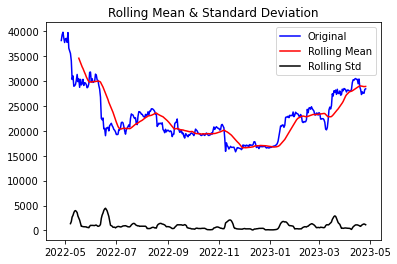

ADF Stastistic: -2.854231
p-value: 0.050935
The graph is non stationery
Critical values:
	1%: -3.448 
	5%: -2.869 
	10%: -2.571 


In [45]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['Close']      
test_stationarity(ts)

Since the p value is greater than 0.05 the time series is non stationary. Okay so far we tested the series and it is non stationary. So there is some work that needs to be done here. So now we use transformations to make the series stationary.

# Log Transforming the series

Log transformation is used to unskew highly skewed data. Thus helping in forecasting process.

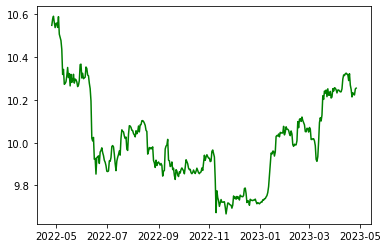

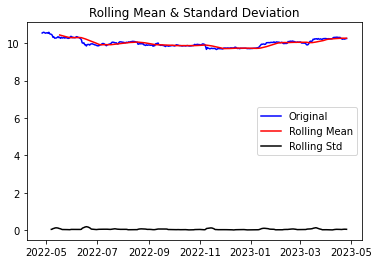

ADF Stastistic: -2.383327
p-value: 0.146498
The graph is non stationery
Critical values:
	1%: -3.448 
	5%: -2.869 
	10%: -2.571 


In [47]:
ts_log = np.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

The series is still non stationary as p value is still greater than 0.05 it coming with 0.14 so we need to make further transformations. So let’s go ahead with differencing.

# Remove trend and seasonality with differencing

In case of differencing to make the time series stationary the current value is subtracted with the previous values. Due to this the mean is stabilized and hence the chances of stationarity of time series are increased.

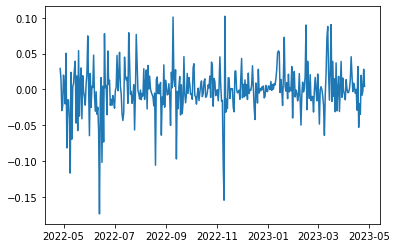

In [49]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

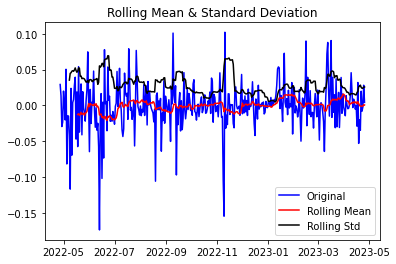

ADF Stastistic: -18.753658
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.448 
	5%: -2.870 
	10%: -2.571 


In [50]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

As our time series is now stationary asour p value is less than 0.05 therefore we can apply time series forecasting models.

# Auto Regressive model

Auto regressive model is a time series forecasting model where current values are dependent on past values.

In [52]:
from statsmodels.tsa.arima_model import ARIMA


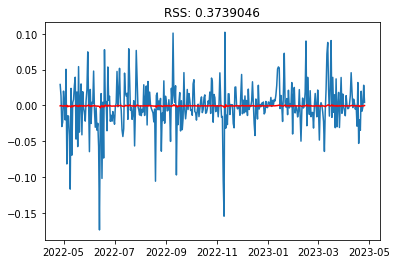

In [69]:
# follow lag
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

# Moving Average Model
In moving average model the series is dependent on past error terms.

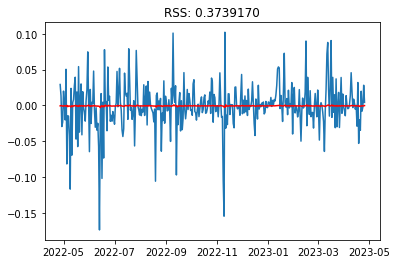

In [70]:
# follow error
model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

# Auto Regressive Integrated Moving Average Model

It is a combination of both AR and MA models. It makes the time series stationary by itself through the process of differencing. Therefore differencing need not be done explicitly for ARIMA model

In [64]:
import warnings
warnings.filterwarnings('ignore')

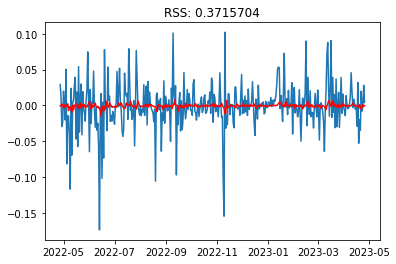

In [65]:
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

Thus we see that the RSS (Residual Sum of Squares) error is minimum for ARIMA model. Therefore ARIMA model is the best among the three models because of use of dependence on both lagged values and error terms. Therefore it is further used to calculate the mean square error. Here in the below code snippet the dataset is divided into train and test.

For every value in the test test we apply an ARIMA model and then the error is calculated and then after iterating over all values in the test set the mean error between predicted and expected value is calculated.

Printing Predicted vs Expected Values...


predicted = 21119.386986,   expected = 21161.519531,   error = 0.199100  %
predicted = 21142.658387,   expected = 20688.781250,   error = 2.193832  %
predicted = 20644.438648,   expected = 21086.792969,   error = 2.097779  %
predicted = 21005.871205,   expected = 22676.552734,   error = 7.367440  %
predicted = 22677.915131,   expected = 22777.625000,   error = 0.437754  %
predicted = 22864.368021,   expected = 22720.416016,   error = 0.633580  %
predicted = 22687.998133,   expected = 22934.431641,   error = 1.074513  %
predicted = 22892.432594,   expected = 22636.468750,   error = 1.130759  %
predicted = 22611.139358,   expected = 23117.859375,   error = 2.191899  %
predicted = 23059.075253,   expected = 23032.777344,   error = 0.114176  %
predicted = 23030.391391,   expected = 23078.728516,   error = 0.209444  %
predicted = 23034.285955,   expected = 23031.089844,   error = 0.013877  %
predicted = 22996.129811,   expected = 23774.566406,   er

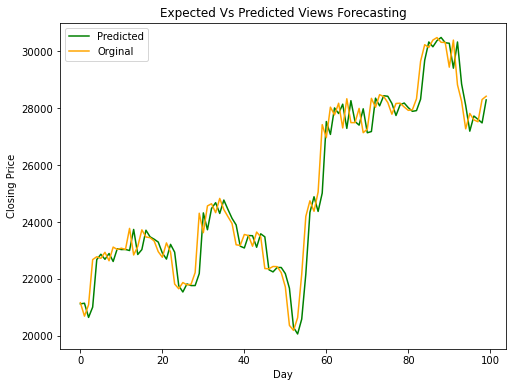

In [68]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()
